<a href="https://colab.research.google.com/github/yankyerajoseph/yankyerajoseph/blob/main/Appendix_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from google.colab import files

#Read csv data relating to b. Biogas yield data in ml/ g oTS for fibrous materials (YCPM: MCP, MPP)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/SummaryofBY/DSFibrous.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()
print ("Biogas yield of three variants of fibrous waste in ml/g oTS: YCPM: Milled mixture of Yam, Cassava, Plantain Peels, MCP: Milled Cassava Peels, MPP: Milled Plantain Peels")
print (data)
print (data.columns)

Mounted at /content/drive
Biogas yield of three variants of fibrous waste in ml/g oTS: YCPM: Milled mixture of Yam, Cassava, Plantain Peels, MCP: Milled Cassava Peels, MPP: Milled Plantain Peels
    HRT (d)  Biogas Yield for YCPM (ml/g oTS)  Biogas MPP (ml/g oTS)  \
0      0.00                              0.00                   0.00   
1      0.79                             45.21                  25.61   
2      0.95                             65.10                  31.14   
3      1.08                             78.62                  37.56   
4      1.65                             99.97                  81.73   
5      1.88                            102.09                  93.52   
6      2.70                            107.26                 116.97   
7      3.69                            113.36                 130.05   
8      3.89                            116.15                 131.72   
9      4.83                            117.34                 137.20   
10     5.75  

In [ ]:
#

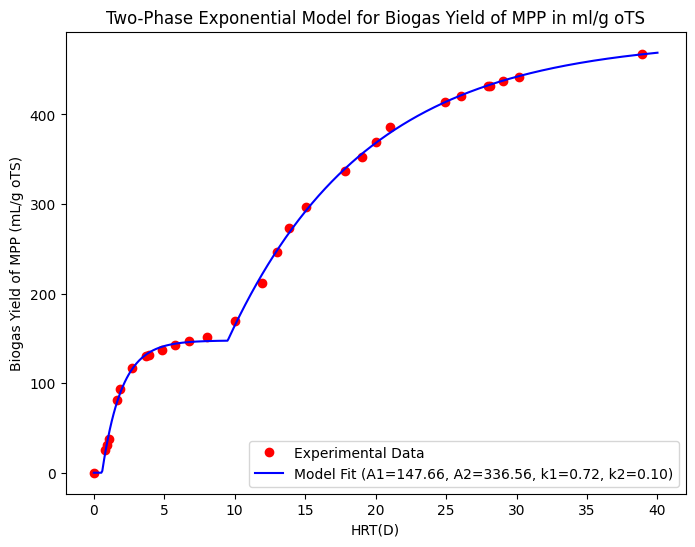

R-squared: 0.9994369763806397
RMSE: 3.5481192438049423
biogas_model equation:
 B(t)) 147.66 * (1 - exp(-0.72 * (t - 0.58))) * (t >= 0.58) + 336.56 * (1 - exp(-0.10 * (t - 9.50))) * (t >= 9.50)
Fitted Parameters:
A1 (Amplitude, Phase 1): 147.66 mL/g
A2 (Amplitude, Phase 2): 336.56 mL/g
k1 (Rate Constant, Phase 1): 0.72 day⁻¹
k2 (Rate Constant, Phase 2): 0.10 day⁻¹
t_lag1 (Lag Time, Phase 1): 0.58 days
t_lag2 (Lag Time, Phase 2): 9.50 days


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from google.colab import files
from sklearn.metrics import r2_score, mean_squared_error # Import the missing modules


# Two-phase exponential model
def two_phase_exponential(t, A1, A2, k1, k2, t_lag1, t_lag2):
    """
    Two-phase exponential model for biogas production.

    Args:
        t (array-like): Time values.
        A1 (float): Amplitude of the first exponential phase.
        A2 (float): Amplitude of the second exponential phase.
        k1 (float): Rate constant of the first exponential phase.
        k2 (float): Rate constant of the second exponential phase.
        t_lag1 (float): Lag time for the first exponential phase.
        t_lag2 (float): Lag time for the second exponential phase.

    Returns:
        array-like: Biogas production values predicted by the model.
    """
    phase1 = A1 * (1 - np.exp(-k1 * (t - t_lag1))) * (t >= t_lag1)
    phase2 = A2 * (1 - np.exp(-k2 * (t - t_lag2))) * (t >= t_lag2)
    return phase1 + phase2

# Data
time_data = data['HRT (d)'].values
biogas_data = data['Biogas MPP (ml/g oTS)'].values

# Initial guesses for parameters
initial_guesses = [100, 200, 0.1, 0.05, 2, 7]

# Fit the model to the data
params, covariance = curve_fit(
    two_phase_exponential,
    time_data,
    biogas_data,
    p0=initial_guesses,
    maxfev=50000  # Increased maxfev for more iterations
)

# Extract fitted parameters
A1_fitted, A2_fitted, k1_fitted, k2_fitted, t_lag1_fitted, t_lag2_fitted = params

# Generate model predictions
time_model = np.linspace(0, 40, 600)
biogas_model = two_phase_exponential(
    time_model, A1_fitted, A2_fitted, k1_fitted, k2_fitted, t_lag1_fitted, t_lag2_fitted
)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(time_data, biogas_data, 'o', label="Experimental Data", color='red')
plt.plot(time_model, biogas_model, label=f"Model Fit (A1={A1_fitted:.2f}, A2={A2_fitted:.2f}, k1={k1_fitted:.2f}, k2={k2_fitted:.2f})", color='blue')
plt.title("Two-Phase Exponential Model for Biogas Yield of MPP in ml/g oTS")
plt.xlabel("HRT(D)")
plt.ylabel("Biogas Yield of MPP (mL/g oTS)")
plt.legend()
plt.grid(False)
plt.show()

# Generate model predictions for evaluation (using time_data)
biogas_model_eval = two_phase_exponential(
    time_data, A1_fitted, A2_fitted, k1_fitted, k2_fitted, t_lag1_fitted, t_lag2_fitted
)

# Evaluate the model
r2 = r2_score(biogas_data, biogas_model_eval) # Calculate R-squared
rmse = np.sqrt(mean_squared_error(biogas_data, biogas_model_eval))

# Print evaluation metrics
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")


# Print model equation, fitted parameters, and lag phases
print('biogas_model equation:')
print(f" B(t)) {A1_fitted:.2f} * (1 - exp(-{k1_fitted:.2f} * (t - {t_lag1_fitted:.2f}))) * (t >= {t_lag1_fitted:.2f}) + {A2_fitted:.2f} * (1 - exp(-{k2_fitted:.2f} * (t - {t_lag2_fitted:.2f}))) * (t >= {t_lag2_fitted:.2f})")

print(f"Fitted Parameters:")
print(f"A1 (Amplitude, Phase 1): {A1_fitted:.2f} mL/g")
print(f"A2 (Amplitude, Phase 2): {A2_fitted:.2f} mL/g")
print(f"k1 (Rate Constant, Phase 1): {k1_fitted:.2f} day⁻¹")
print(f"k2 (Rate Constant, Phase 2): {k2_fitted:.2f} day⁻¹")
print(f"t_lag1 (Lag Time, Phase 1): {t_lag1_fitted:.2f} days")
print(f"t_lag2 (Lag Time, Phase 2): {t_lag2_fitted:.2f} days")

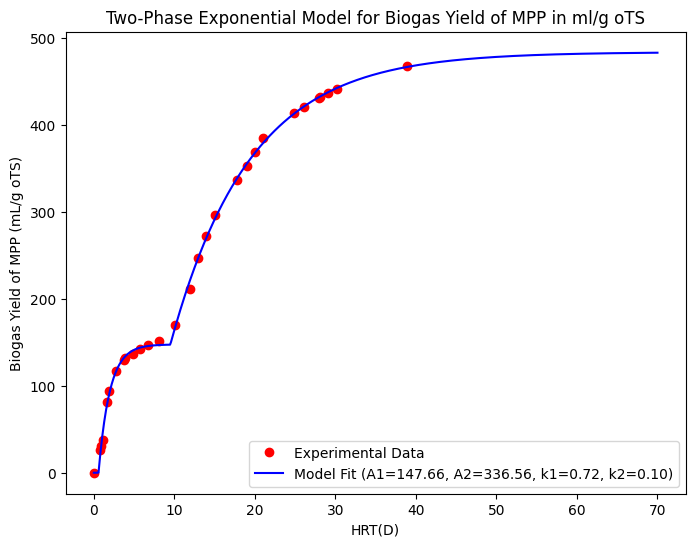

R-squared: 0.9994369763806397
RMSE: 3.5481192438049423
biogas_model equation:
 B(t)) 147.66 * (1 - exp(-0.72 * (t - 0.58))) * (t >= 0.58) + 336.56 * (1 - exp(-0.10 * (t - 9.50))) * (t >= 9.50)
Fitted Parameters:
A1 (Amplitude, Phase 1): 147.66 mL/g
A2 (Amplitude, Phase 2): 336.56 mL/g
k1 (Rate Constant, Phase 1): 0.72 day⁻¹
k2 (Rate Constant, Phase 2): 0.10 day⁻¹
t_lag1 (Lag Time, Phase 1): 0.58 days
t_lag2 (Lag Time, Phase 2): 9.50 days


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from google.colab import files
from sklearn.metrics import r2_score, mean_squared_error # Import the missing modules


# Two-phase exponential model
def two_phase_exponential(t, A1, A2, k1, k2, t_lag1, t_lag2):
    """
    Two-phase exponential model for biogas production.

    Args:
        t (array-like): Time values.
        A1 (float): Amplitude of the first exponential phase.
        A2 (float): Amplitude of the second exponential phase.
        k1 (float): Rate constant of the first exponential phase.
        k2 (float): Rate constant of the second exponential phase.
        t_lag1 (float): Lag time for the first exponential phase.
        t_lag2 (float): Lag time for the second exponential phase.

    Returns:
        array-like: Biogas production values predicted by the model.
    """
    phase1 = A1 * (1 - np.exp(-k1 * (t - t_lag1))) * (t >= t_lag1)
    phase2 = A2 * (1 - np.exp(-k2 * (t - t_lag2))) * (t >= t_lag2)
    return phase1 + phase2

# Data
time_data = data['HRT (d)'].values
biogas_data = data['Biogas MPP (ml/g oTS)'].values

# Initial guesses for parameters
initial_guesses = [100, 200, 0.1, 0.05, 2, 7]

# Fit the model to the data
params, covariance = curve_fit(
    two_phase_exponential,
    time_data,
    biogas_data,
    p0=initial_guesses,
    maxfev=50000  # Increased maxfev for more iterations
)

# Extract fitted parameters
A1_fitted, A2_fitted, k1_fitted, k2_fitted, t_lag1_fitted, t_lag2_fitted = params

# Generate model predictions
time_model = np.linspace(0, 70, 600)
biogas_model = two_phase_exponential(
    time_model, A1_fitted, A2_fitted, k1_fitted, k2_fitted, t_lag1_fitted, t_lag2_fitted
)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(time_data, biogas_data, 'o', label="Experimental Data", color='red')
plt.plot(time_model, biogas_model, label=f"Model Fit (A1={A1_fitted:.2f}, A2={A2_fitted:.2f}, k1={k1_fitted:.2f}, k2={k2_fitted:.2f})", color='blue')
plt.title("Two-Phase Exponential Model for Biogas Yield of MPP in ml/g oTS")
plt.xlabel("HRT(D)")
plt.ylabel("Biogas Yield of MPP (mL/g oTS)")
plt.legend()
plt.grid(False)
plt.show()

# Generate model predictions for evaluation (using time_data)
biogas_model_eval = two_phase_exponential(
    time_data, A1_fitted, A2_fitted, k1_fitted, k2_fitted, t_lag1_fitted, t_lag2_fitted
)

# Evaluate the model
r2 = r2_score(biogas_data, biogas_model_eval) # Calculate R-squared
rmse = np.sqrt(mean_squared_error(biogas_data, biogas_model_eval))

# Print evaluation metrics
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")


# Print model equation, fitted parameters, and lag phases
print('biogas_model equation:')
print(f" B(t)) {A1_fitted:.2f} * (1 - exp(-{k1_fitted:.2f} * (t - {t_lag1_fitted:.2f}))) * (t >= {t_lag1_fitted:.2f}) + {A2_fitted:.2f} * (1 - exp(-{k2_fitted:.2f} * (t - {t_lag2_fitted:.2f}))) * (t >= {t_lag2_fitted:.2f})")

print(f"Fitted Parameters:")
print(f"A1 (Amplitude, Phase 1): {A1_fitted:.2f} mL/g")
print(f"A2 (Amplitude, Phase 2): {A2_fitted:.2f} mL/g")
print(f"k1 (Rate Constant, Phase 1): {k1_fitted:.2f} day⁻¹")
print(f"k2 (Rate Constant, Phase 2): {k2_fitted:.2f} day⁻¹")
print(f"t_lag1 (Lag Time, Phase 1): {t_lag1_fitted:.2f} days")
print(f"t_lag2 (Lag Time, Phase 2): {t_lag2_fitted:.2f} days")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Biogas yield of three variants of fibrous waste in ml/g oTS: YCPM: Milled mixture of Yam, Cassava, Plantain Peels, MCP: Milled Cassava Peels, MPP: Milled Plantain Peels
    HRT (d)  Biogas Yield for YCPM (ml/g oTS)  Biogas MPP (ml/g oTS)  \
0      0.00                              0.00                   0.00   
1      0.79                             45.21                  25.61   
2      0.95                             65.10                  31.14   
3      1.08                             78.62                  37.56   
4      1.65                             99.97                  81.73   
5      1.88                            102.09                  93.52   
6      2.70                            107.26                 116.97   
7      3.69                            113.36                 130.05   
8      3.89                            116.15         

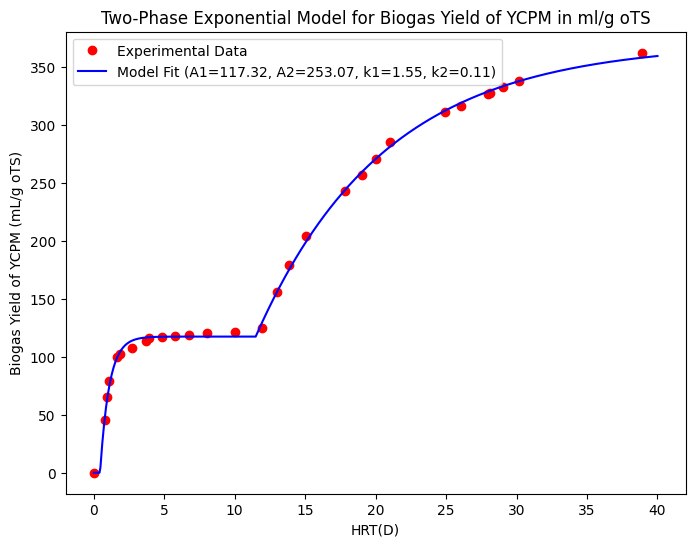

R-squared: 0.9992341867016811
RMSE: 2.8673720375657585
biogas_model equation:
 B(t)) 117.32 * (1 - exp(-1.55 * (t - 0.44))) * (t >= 0.44) + 253.07 * (1 - exp(-0.11 * (t - 11.49))) * (t >= 11.49)
Fitted Parameters:
A1 (Amplitude, Phase 1): 117.32 mL/g
A2 (Amplitude, Phase 2): 253.07 mL/g
k1 (Rate Constant, Phase 1): 1.55 day⁻¹
k2 (Rate Constant, Phase 2): 0.11 day⁻¹
t_lag1 (Lag Time, Phase 1): 0.44 days
t_lag2 (Lag Time, Phase 2): 11.49 days


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from google.colab import files
from sklearn.metrics import r2_score, mean_squared_error # Import the missing modules

#Read csv data relating to b. Biogas yield data in ml/ g oTS for fibrous materials (YCPM: MCP, MPP)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/SummaryofBY/DSFibrous.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()
print ("Biogas yield of three variants of fibrous waste in ml/g oTS: YCPM: Milled mixture of Yam, Cassava, Plantain Peels, MCP: Milled Cassava Peels, MPP: Milled Plantain Peels")
print (data)
print (data.columns)


# Two-phase exponential model
def two_phase_exponential(t, A1, A2, k1, k2, t_lag1, t_lag2):
    """
    Two-phase exponential model for biogas production.

    Args:
        t (array-like): Time values.
        A1 (float): Amplitude of the first exponential phase.
        A2 (float): Amplitude of the second exponential phase.
        k1 (float): Rate constant of the first exponential phase.
        k2 (float): Rate constant of the second exponential phase.
        t_lag1 (float): Lag time for the first exponential phase.
        t_lag2 (float): Lag time for the second exponential phase.

    Returns:
        array-like: Biogas production values predicted by the model.
    """
    phase1 = A1 * (1 - np.exp(-k1 * (t - t_lag1))) * (t >= t_lag1)
    phase2 = A2 * (1 - np.exp(-k2 * (t - t_lag2))) * (t >= t_lag2)
    return phase1 + phase2

# Data (Changed to YCPM)
time_data = data['HRT (d)'].values
biogas_data = data['Biogas Yield for YCPM (ml/g oTS)'].values

# Initial guesses for parameters
initial_guesses = [100, 200, 0.1, 0.05, 2, 7]

# Fit the model to the data
params, covariance = curve_fit(
    two_phase_exponential,
    time_data,
    biogas_data,
    p0=initial_guesses,
    maxfev=50000  # Increased maxfev for more iterations
)

# Extract fitted parameters
A1_fitted, A2_fitted, k1_fitted, k2_fitted, t_lag1_fitted, t_lag2_fitted = params

# Generate model predictions
time_model = np.linspace(0, 40, 600)  # Adjust time range if needed
biogas_model = two_phase_exponential(
    time_model, A1_fitted, A2_fitted, k1_fitted, k2_fitted, t_lag1_fitted, t_lag2_fitted
)

# Plotting (Changed title and y-label)
plt.figure(figsize=(8, 6))
plt.plot(time_data, biogas_data, 'o', label="Experimental Data", color='red')
plt.plot(time_model, biogas_model, label=f"Model Fit (A1={A1_fitted:.2f}, A2={A2_fitted:.2f}, k1={k1_fitted:.2f}, k2={k2_fitted:.2f})", color='blue')
plt.title("Two-Phase Exponential Model for Biogas Yield of YCPM in ml/g oTS")
plt.xlabel("HRT(D)")
plt.ylabel("Biogas Yield of YCPM (mL/g oTS)")
plt.legend()
plt.grid(False)
plt.show()

# Generate model predictions for evaluation (using time_data)
biogas_model_eval = two_phase_exponential(
    time_data, A1_fitted, A2_fitted, k1_fitted, k2_fitted, t_lag1_fitted, t_lag2_fitted
)

# Evaluate the model
r2 = r2_score(biogas_data, biogas_model_eval) # Calculate R-squared
rmse = np.sqrt(mean_squared_error(biogas_data, biogas_model_eval))

# Print evaluation metrics
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")


# Print model equation, fitted parameters, and lag phases
print('biogas_model equation:')
print(f" B(t)) {A1_fitted:.2f} * (1 - exp(-{k1_fitted:.2f} * (t - {t_lag1_fitted:.2f}))) * (t >= {t_lag1_fitted:.2f}) + {A2_fitted:.2f} * (1 - exp(-{k2_fitted:.2f} * (t - {t_lag2_fitted:.2f}))) * (t >= {t_lag2_fitted:.2f})")

print(f"Fitted Parameters:")
print(f"A1 (Amplitude, Phase 1): {A1_fitted:.2f} mL/g")
print(f"A2 (Amplitude, Phase 2): {A2_fitted:.2f} mL/g")
print(f"k1 (Rate Constant, Phase 1): {k1_fitted:.2f} day⁻¹")
print(f"k2 (Rate Constant, Phase 2): {k2_fitted:.2f} day⁻¹")
print(f"t_lag1 (Lag Time, Phase 1): {t_lag1_fitted:.2f} days")
print(f"t_lag2 (Lag Time, Phase 2): {t_lag2_fitted:.2f} days")

In [ ]:
# Composite Graph

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


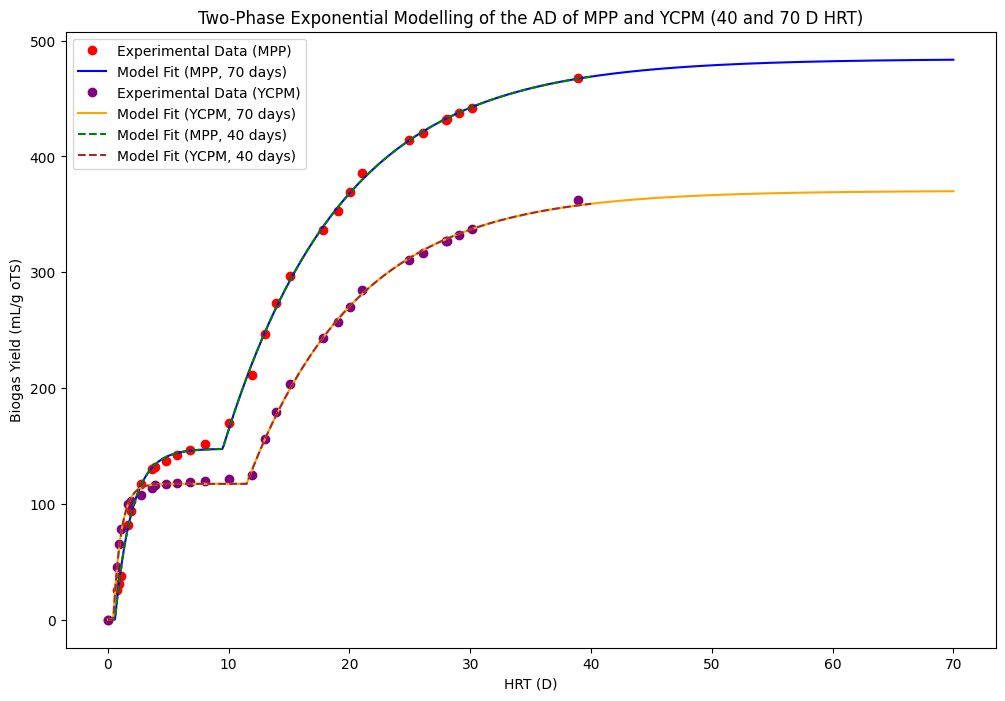

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from google.colab import drive
from sklearn.metrics import r2_score, mean_squared_error

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/SummaryofBY/DSFibrous.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()

# Two-phase exponential model
def two_phase_exponential(t, A1, A2, k1, k2, t_lag1, t_lag2):
    phase1 = A1 * (1 - np.exp(-k1 * (t - t_lag1))) * (t >= t_lag1)
    phase2 = A2 * (1 - np.exp(-k2 * (t - t_lag2))) * (t >= t_lag2)
    return phase1 + phase2

# Data for MPP
time_data_mpp = data['HRT (d)'].values
biogas_data_mpp = data['Biogas MPP (ml/g oTS)'].values

# Data for YCPM
time_data_ycpm = data['HRT (d)'].values
biogas_data_ycpm = data['Biogas Yield for YCPM (ml/g oTS)'].values

# Initial guesses for parameters
initial_guesses = [100, 200, 0.1, 0.05, 2, 7]

# Create a single figure and axes for the composite plot
plt.figure(figsize=(12, 8))

# --- Fit and Plot for MPP (70 days) ---
try:
    params_mpp_70, covariance_mpp_70 = curve_fit(
        two_phase_exponential,
        time_data_mpp,
        biogas_data_mpp,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_mpp_70, A2_fitted_mpp_70, k1_fitted_mpp_70, k2_fitted_mpp_70, t_lag1_fitted_mpp_70, t_lag2_fitted_mpp_70 = params_mpp_70
    time_model_70 = np.linspace(0, 70, 600)
    biogas_model_mpp_70 = two_phase_exponential(
        time_model_70, *params_mpp_70
    )
    plt.plot(time_data_mpp, biogas_data_mpp, 'o', label="Experimental Data (MPP)", color='red')
    plt.plot(time_model_70, biogas_model_mpp_70, '-', label=f"Model Fit (MPP, 70 days)", color='blue')
except RuntimeError as e:
    print(f"Could not fit model for MPP (70 days): {e}")

# --- Fit and Plot for YCPM (70 days) ---
try:
    params_ycpm_70, covariance_ycpm_70 = curve_fit(
        two_phase_exponential,
        time_data_ycpm,
        biogas_data_ycpm,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_ycpm_70, A2_fitted_ycpm_70, k1_fitted_ycpm_70, k2_fitted_ycpm_70, t_lag1_fitted_ycpm_70, t_lag2_fitted_ycpm_70 = params_ycpm_70
    biogas_model_ycpm_70 = two_phase_exponential(
        time_model_70, *params_ycpm_70
    )
    plt.plot(time_data_ycpm, biogas_data_ycpm, 'o', label="Experimental Data (YCPM)", color='purple')
    plt.plot(time_model_70, biogas_model_ycpm_70, '-', label=f"Model Fit (YCPM, 70 days)", color='orange')
except RuntimeError as e:
    print(f"Could not fit model for YCPM (70 days): {e}")

# --- Fit and Plot for MPP (40 days) ---
try:
    # Filter data for the first 40 days
    mask_mpp_40 = time_data_mpp <= 40
    time_data_mpp_40 = time_data_mpp[mask_mpp_40]
    biogas_data_mpp_40 = biogas_data_mpp[mask_mpp_40]

    params_mpp_40, covariance_mpp_40 = curve_fit(
        two_phase_exponential,
        time_data_mpp_40,
        biogas_data_mpp_40,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_mpp_40, A2_fitted_mpp_40, k1_fitted_mpp_40, k2_fitted_mpp_40, t_lag1_fitted_mpp_40, t_lag2_fitted_mpp_40 = params_mpp_40
    time_model_40 = np.linspace(0, 40, 600)
    biogas_model_mpp_40 = two_phase_exponential(
        time_model_40, *params_mpp_40
    )
    plt.plot(time_model_40, biogas_model_mpp_40, '--', label=f"Model Fit (MPP, 40 days)", color='green')
except RuntimeError as e:
    print(f"Could not fit model for MPP (40 days): {e}")

# --- Fit and Plot for YCPM (40 days) ---
try:
    # Filter data for the first 40 days
    mask_ycpm_40 = time_data_ycpm <= 40
    time_data_ycpm_40 = time_data_ycpm[mask_ycpm_40]
    biogas_data_ycpm_40 = biogas_data_ycpm[mask_ycpm_40]

    params_ycpm_40, covariance_ycpm_40 = curve_fit(
        two_phase_exponential,
        time_data_ycpm_40,
        biogas_data_ycpm_40,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_ycpm_40, A2_fitted_ycpm_40, k1_fitted_ycpm_40, k2_fitted_ycpm_40, t_lag1_fitted_ycpm_40, t_lag2_fitted_ycpm_40 = params_ycpm_40
    biogas_model_ycpm_40 = two_phase_exponential(
        time_model_40, *params_ycpm_40
    )
    plt.plot(time_model_40, biogas_model_ycpm_40, '--', label=f"Model Fit (YCPM, 40 days)", color='brown')
except RuntimeError as e:
    print(f"Could not fit model for YCPM (40 days): {e}")


# Add title and labels to the composite plot
plt.title("Two-Phase Exponential Modelling of the AD of MPP and YCPM (40 and 70 D HRT)")
plt.xlabel("HRT (D)")
plt.ylabel("Biogas Yield (mL/g oTS)")
plt.legend()
plt.grid(False)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


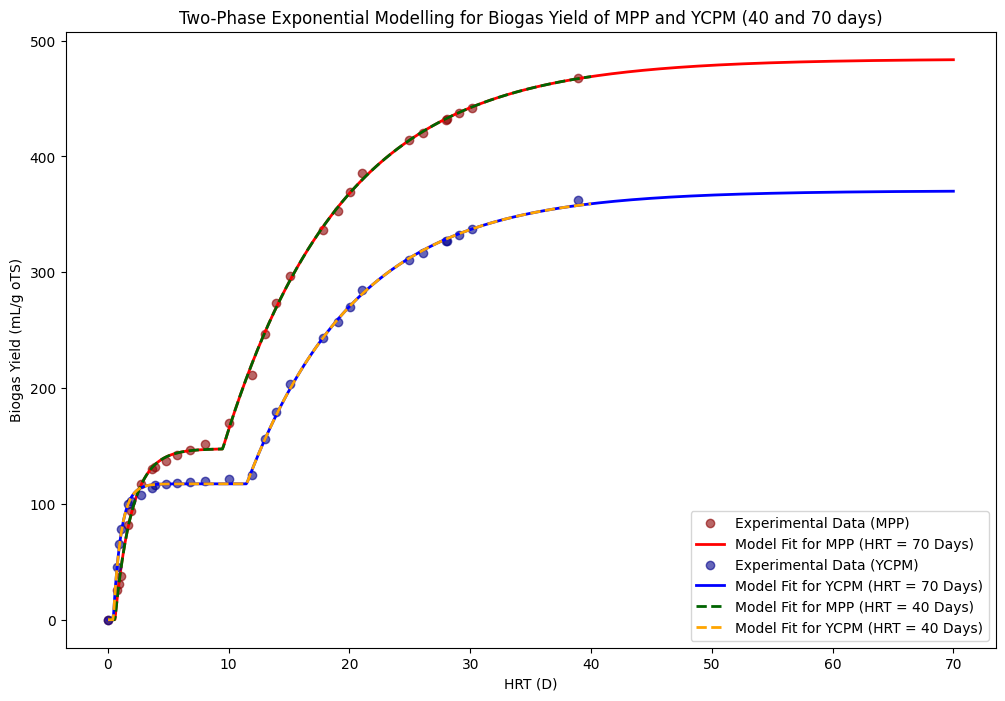

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from google.colab import drive
from sklearn.metrics import r2_score, mean_squared_error

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/SummaryofBY/DSFibrous.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()

# Two-phase exponential model
def two_phase_exponential(t, A1, A2, k1, k2, t_lag1, t_lag2):
    phase1 = A1 * (1 - np.exp(-k1 * (t - t_lag1))) * (t >= t_lag1)
    phase2 = A2 * (1 - np.exp(-k2 * (t - t_lag2))) * (t >= t_lag2)
    return phase1 + phase2

# Data for MPP
time_data_mpp = data['HRT (d)'].values
biogas_data_mpp = data['Biogas MPP (ml/g oTS)'].values

# Data for YCPM
time_data_ycpm = data['HRT (d)'].values
biogas_data_ycpm = data['Biogas Yield for YCPM (ml/g oTS)'].values

# Initial guesses for parameters
initial_guesses = [100, 200, 0.1, 0.05, 2, 7]

# Create a single figure and axes for the composite plot
plt.figure(figsize=(12, 8))

# --- Fit and Plot for MPP (70 days) ---
try:
    params_mpp_70, covariance_mpp_70 = curve_fit(
        two_phase_exponential,
        time_data_mpp,
        biogas_data_mpp,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_mpp_70, A2_fitted_mpp_70, k1_fitted_mpp_70, k2_fitted_mpp_70, t_lag1_fitted_mpp_70, t_lag2_fitted_mpp_70 = params_mpp_70
    time_model_70 = np.linspace(0, 70, 600)
    biogas_model_mpp_70 = two_phase_exponential(
        time_model_70, *params_mpp_70
    )
    plt.plot(time_data_mpp, biogas_data_mpp, 'o', label="Experimental Data (MPP)", color='darkred', alpha=0.6)
    plt.plot(time_model_70, biogas_model_mpp_70, '-', label=f"Model Fit for MPP (HRT = 70 Days)", color='red', linewidth=2)
except RuntimeError as e:
    print(f"Could not fit model for MPP (70 days): {e}")

# --- Fit and Plot for YCPM (70 days) ---
try:
    params_ycpm_70, covariance_ycpm_70 = curve_fit(
        two_phase_exponential,
        time_data_ycpm,
        biogas_data_ycpm,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_ycpm_70, A2_fitted_ycpm_70, k1_fitted_ycpm_70, k2_fitted_ycpm_70, t_lag1_fitted_ycpm_70, t_lag2_fitted_ycpm_70 = params_ycpm_70
    biogas_model_ycpm_70 = two_phase_exponential(
        time_model_70, *params_ycpm_70
    )
    plt.plot(time_data_ycpm, biogas_data_ycpm, 'o', label="Experimental Data (YCPM)", color='darkblue', alpha=0.6)
    plt.plot(time_model_70, biogas_model_ycpm_70, '-', label=f"Model Fit for YCPM (HRT = 70 Days)", color='blue', linewidth=2)
except RuntimeError as e:
    print(f"Could not fit model for YCPM (70 days): {e}")

# --- Fit and Plot for MPP (40 days) ---
try:
    # Filter data for the first 40 days
    mask_mpp_40 = time_data_mpp <= 40
    time_data_mpp_40 = time_data_mpp[mask_mpp_40]
    biogas_data_mpp_40 = biogas_data_mpp[mask_mpp_40]

    params_mpp_40, covariance_mpp_40 = curve_fit(
        two_phase_exponential,
        time_data_mpp_40,
        biogas_data_mpp_40,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_mpp_40, A2_fitted_mpp_40, k1_fitted_mpp_40, k2_fitted_mpp_40, t_lag1_fitted_mpp_40, t_lag2_fitted_mpp_40 = params_mpp_40
    time_model_40 = np.linspace(0, 40, 600)
    biogas_model_mpp_40 = two_phase_exponential(
        time_model_40, *params_mpp_40
    )
    plt.plot(time_model_40, biogas_model_mpp_40, '--', label=f"Model Fit for MPP (HRT = 40 Days)", color='darkgreen', linewidth=2)
except RuntimeError as e:
    print(f"Could not fit model for MPP (40 days): {e}")

# --- Fit and Plot for YCPM (40 days) ---
try:
    # Filter data for the first 40 days
    mask_ycpm_40 = time_data_ycpm <= 40
    time_data_ycpm_40 = time_data_ycpm[mask_ycpm_40]
    biogas_data_ycpm_40 = biogas_data_ycpm[mask_ycpm_40]

    params_ycpm_40, covariance_ycpm_40 = curve_fit(
        two_phase_exponential,
        time_data_ycpm_40,
        biogas_data_ycpm_40,
        p0=initial_guesses,
        maxfev=50000
    )
    A1_fitted_ycpm_40, A2_fitted_ycpm_40, k1_fitted_ycpm_40, k2_fitted_ycpm_40, t_lag1_fitted_ycpm_40, t_lag2_fitted_ycpm_40 = params_ycpm_40
    biogas_model_ycpm_40 = two_phase_exponential(
        time_model_40, *params_ycpm_40
    )
    plt.plot(time_model_40, biogas_model_ycpm_40, '--', label=f"Model Fit for YCPM (HRT = 40 Days)", color='orange', linewidth=2)
except RuntimeError as e:
    print(f"Could not fit model for YCPM (40 days): {e}")


# Add title and labels to the composite plot
plt.title("Two-Phase Exponential Modelling for Biogas Yield of MPP and YCPM (40 and 70 days)")
plt.xlabel("HRT (D)")
plt.ylabel("Biogas Yield (mL/g oTS)")
plt.legend(loc='lower right')
plt.grid(False)
plt.show()